In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
datasets = ['CIFAR', 'MNIST']
net_names = ['ConvBig', 'ConvMed', 'FFNN']
perturbations = ['HazeThenRotation', 'ContrastVariationThenRotation', 'ContrastVariationThenHaze']
interval_sizes = np.array([10**(-0.25*k) for k in range(4, 20, 3)]) * 2

In [3]:
import re

class Interval:
    def __init__(self, interval_str):
        m = re.match(r'\[(.*),(.*)\]', interval_str)
        self.lower, self.upper = float(m.group(1)), float(m.group(2))
    def get_abs_max(self):
        return max(abs(self.lower), abs(self.upper))

In [4]:
from statistics import median

NUM_IMAGES = 10

all_data = {}

for dataset in datasets:
    all_data[dataset] = {}
    for net in net_names:
        all_data[dataset][net] = {}
        for perturbation in perturbations:
            all_data[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_nosplit/{net}_{dataset}_{perturbation}_nosplit.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[7])
                
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(2, 10).T
                    avg_norm += la.norm(jacobi, np.inf)
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                if add:
                    data.append((interval_size, time, avg_norm))
                    
            all_data[dataset][net][perturbation] = data            

In [5]:
NUM_IMAGES = 10

all_data_splitting2 = {}

for dataset in datasets:
    all_data_splitting2[dataset] = {}
    for net in net_names:
        all_data_splitting2[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting2[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split2/{net}_{dataset}_{perturbation}_split2.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*4)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(4 * 2, 10).T
                    norm = 0
                    for col in range(0, 4 * 2, 2):
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting2[dataset][net][perturbation] = data  

In [6]:
NUM_IMAGES = 10

all_data_splitting3 = {}

for dataset in datasets:
    all_data_splitting3[dataset] = {}
    for net in net_names:
        all_data_splitting3[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting3[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split3/{net}_{dataset}_{perturbation}_split3.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*9)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(9 * 2, 10).T
                    norm = 0
                    for col in range(0, 9 * 2, 2):
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting3[dataset][net][perturbation] = data  

In [7]:
NUM_IMAGES = 10

all_data_splitting5 = {}

for dataset in datasets:
    all_data_splitting5[dataset] = {}
    for net in net_names:
        all_data_splitting5[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting5[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split5/{net}_{dataset}_{perturbation}_split5.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*25)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(25 * 2, 10).T
                    norm = 0
                    for col in range(0, 25 * 2, 2):
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting5[dataset][net][perturbation] = data  

In [8]:
NUM_IMAGES = 10

all_data_splitting9 = {}

for dataset in datasets:
    all_data_splitting9[dataset] = {}
    for net in net_names:
        all_data_splitting9[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting9[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split9/{net}_{dataset}_{perturbation}_split9.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*81)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(81 * 2, 10).T
                    norm = 0
                    for col in range(0, 81 * 2, 2):
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting9[dataset][net][perturbation] = data  

In [9]:
# baseline format is (lipschitz_constant, time_in_ms)
network_baselines = {'FFNN': {'CIFAR':(97618464.0, 14.711), 'MNIST':(165186992.0, 8.205)},
                    'ConvMed': {'CIFAR':(64603.76171875, 2.042), 'MNIST':(92872.0859375, 2.746)},
                    'ConvBig': {'CIFAR':(1587185536.0, 11.289), 'MNIST':(3638838016.0, 8.871)}}
normalize_constants = {'MNIST': 1/0.3081, 'CIFAR': 1/0.1994}

import pandas as pd
df = pd.read_csv('results_compose/results_compose_baseline/perturbation_baseline.csv', index_col=None)

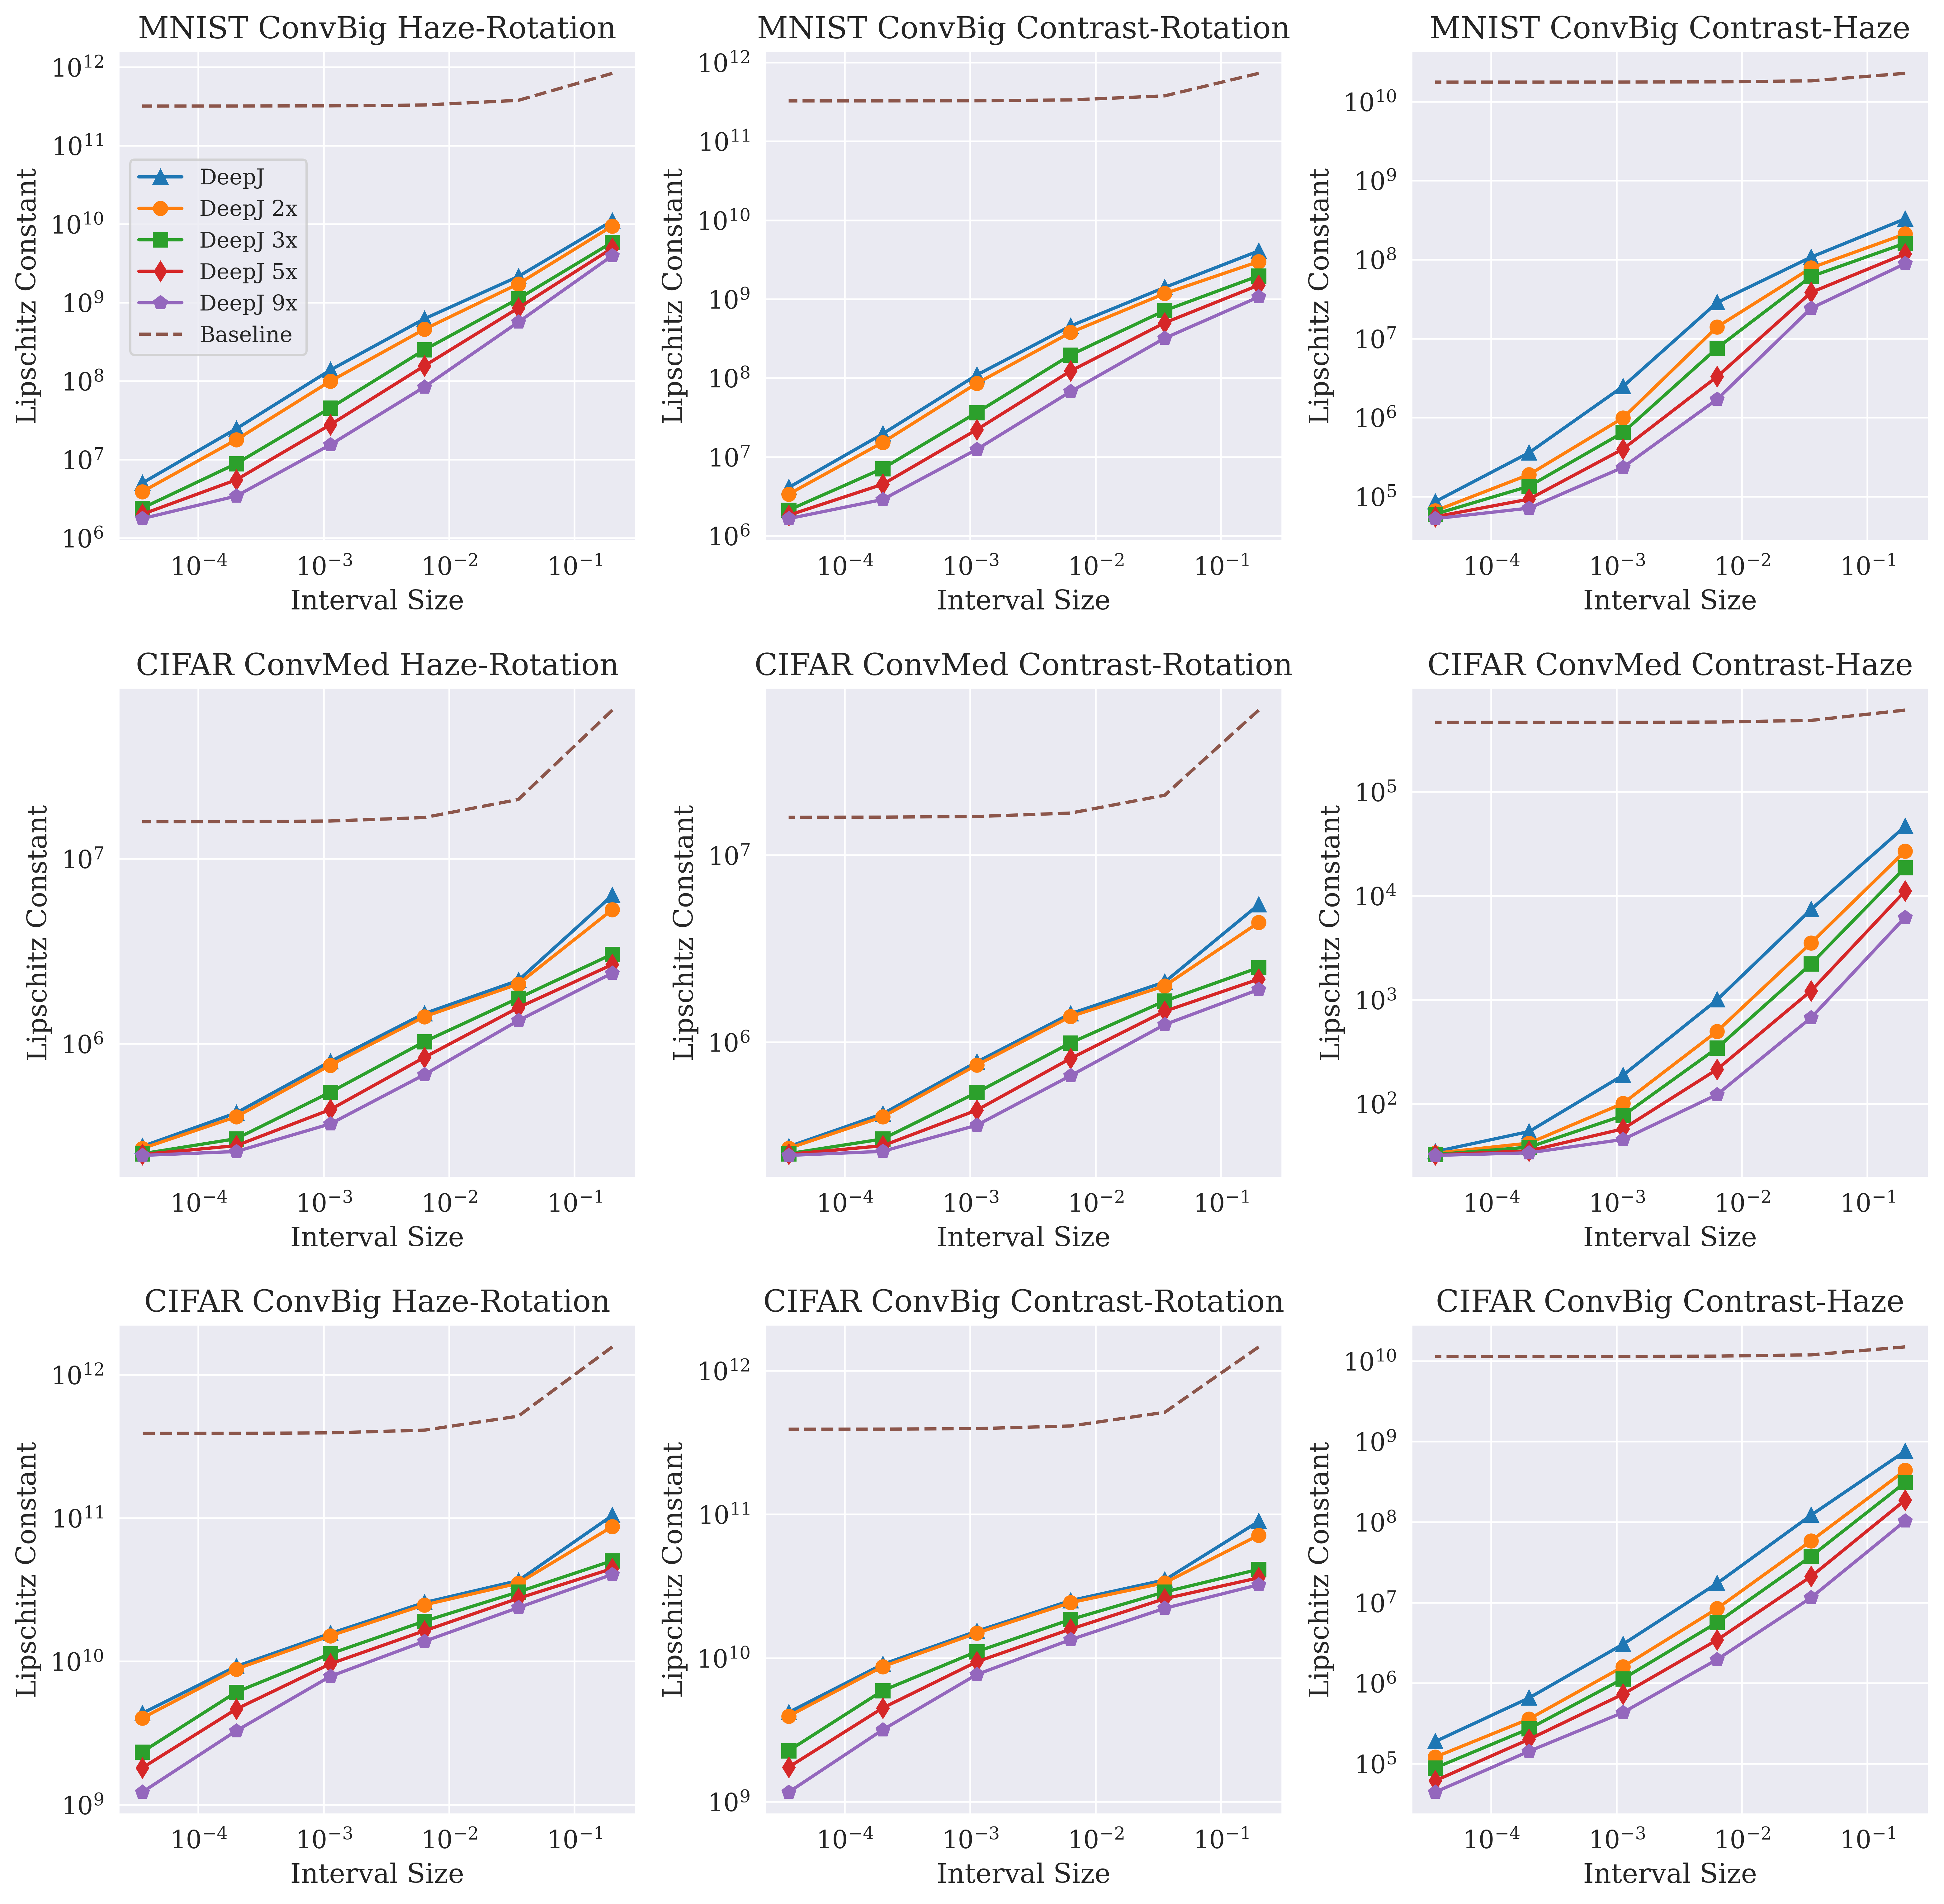

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

params = {'axes.labelsize': 12.5,
          'axes.titlesize': 14.0,
          'xtick.labelsize': 11.5,
          'ytick.labelsize': 11.5}
plt.rcParams.update(params)

sns.set_style("darkgrid", {'font.family':'serif', 'font.serif':'Times New Roman'})

plots_perturbations = {'HazeThenRotation':'Haze-Rotation', 'ContrastVariationThenRotation':'Contrast-Rotation', 'ContrastVariationThenHaze': 'Contrast-Haze'}

tool = 'DeepJ'
fig, axs = plt.subplots(3, 3, figsize=(15, 15), dpi=500)
plt.subplots_adjust(hspace=0.3, wspace=0.25)
    
for dataset, net, i in [('MNIST', 'ConvBig', 0), ('CIFAR', 'ConvMed', 1), ('CIFAR', 'ConvBig', 2)]:
    for j, perturbation in enumerate(perturbations):
        axs[i, j].set_title(f'{dataset} {net} {plots_perturbations[perturbation]}')
        axs[i, j].set_xlabel(u'Interval Size')
        axs[i, j].set_ylabel('Lipschitz Constant')
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')

        interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')

        interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

        interval_size, time, lc = zip(*all_data_splitting3[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 3x')
        
        interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 5x')
        
        interval_size, time, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 9x')

        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        interval_size = baseline['interval_size']
        axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')
        
        if dataset == 'MNIST' and net == 'ConvBig' and perturbation == 'HazeThenRotation':
            axs[i, j].legend(loc=(0.022, 0.38))

plt.savefig('lipschitz_compose_MAIN.png', bbox_inches='tight')

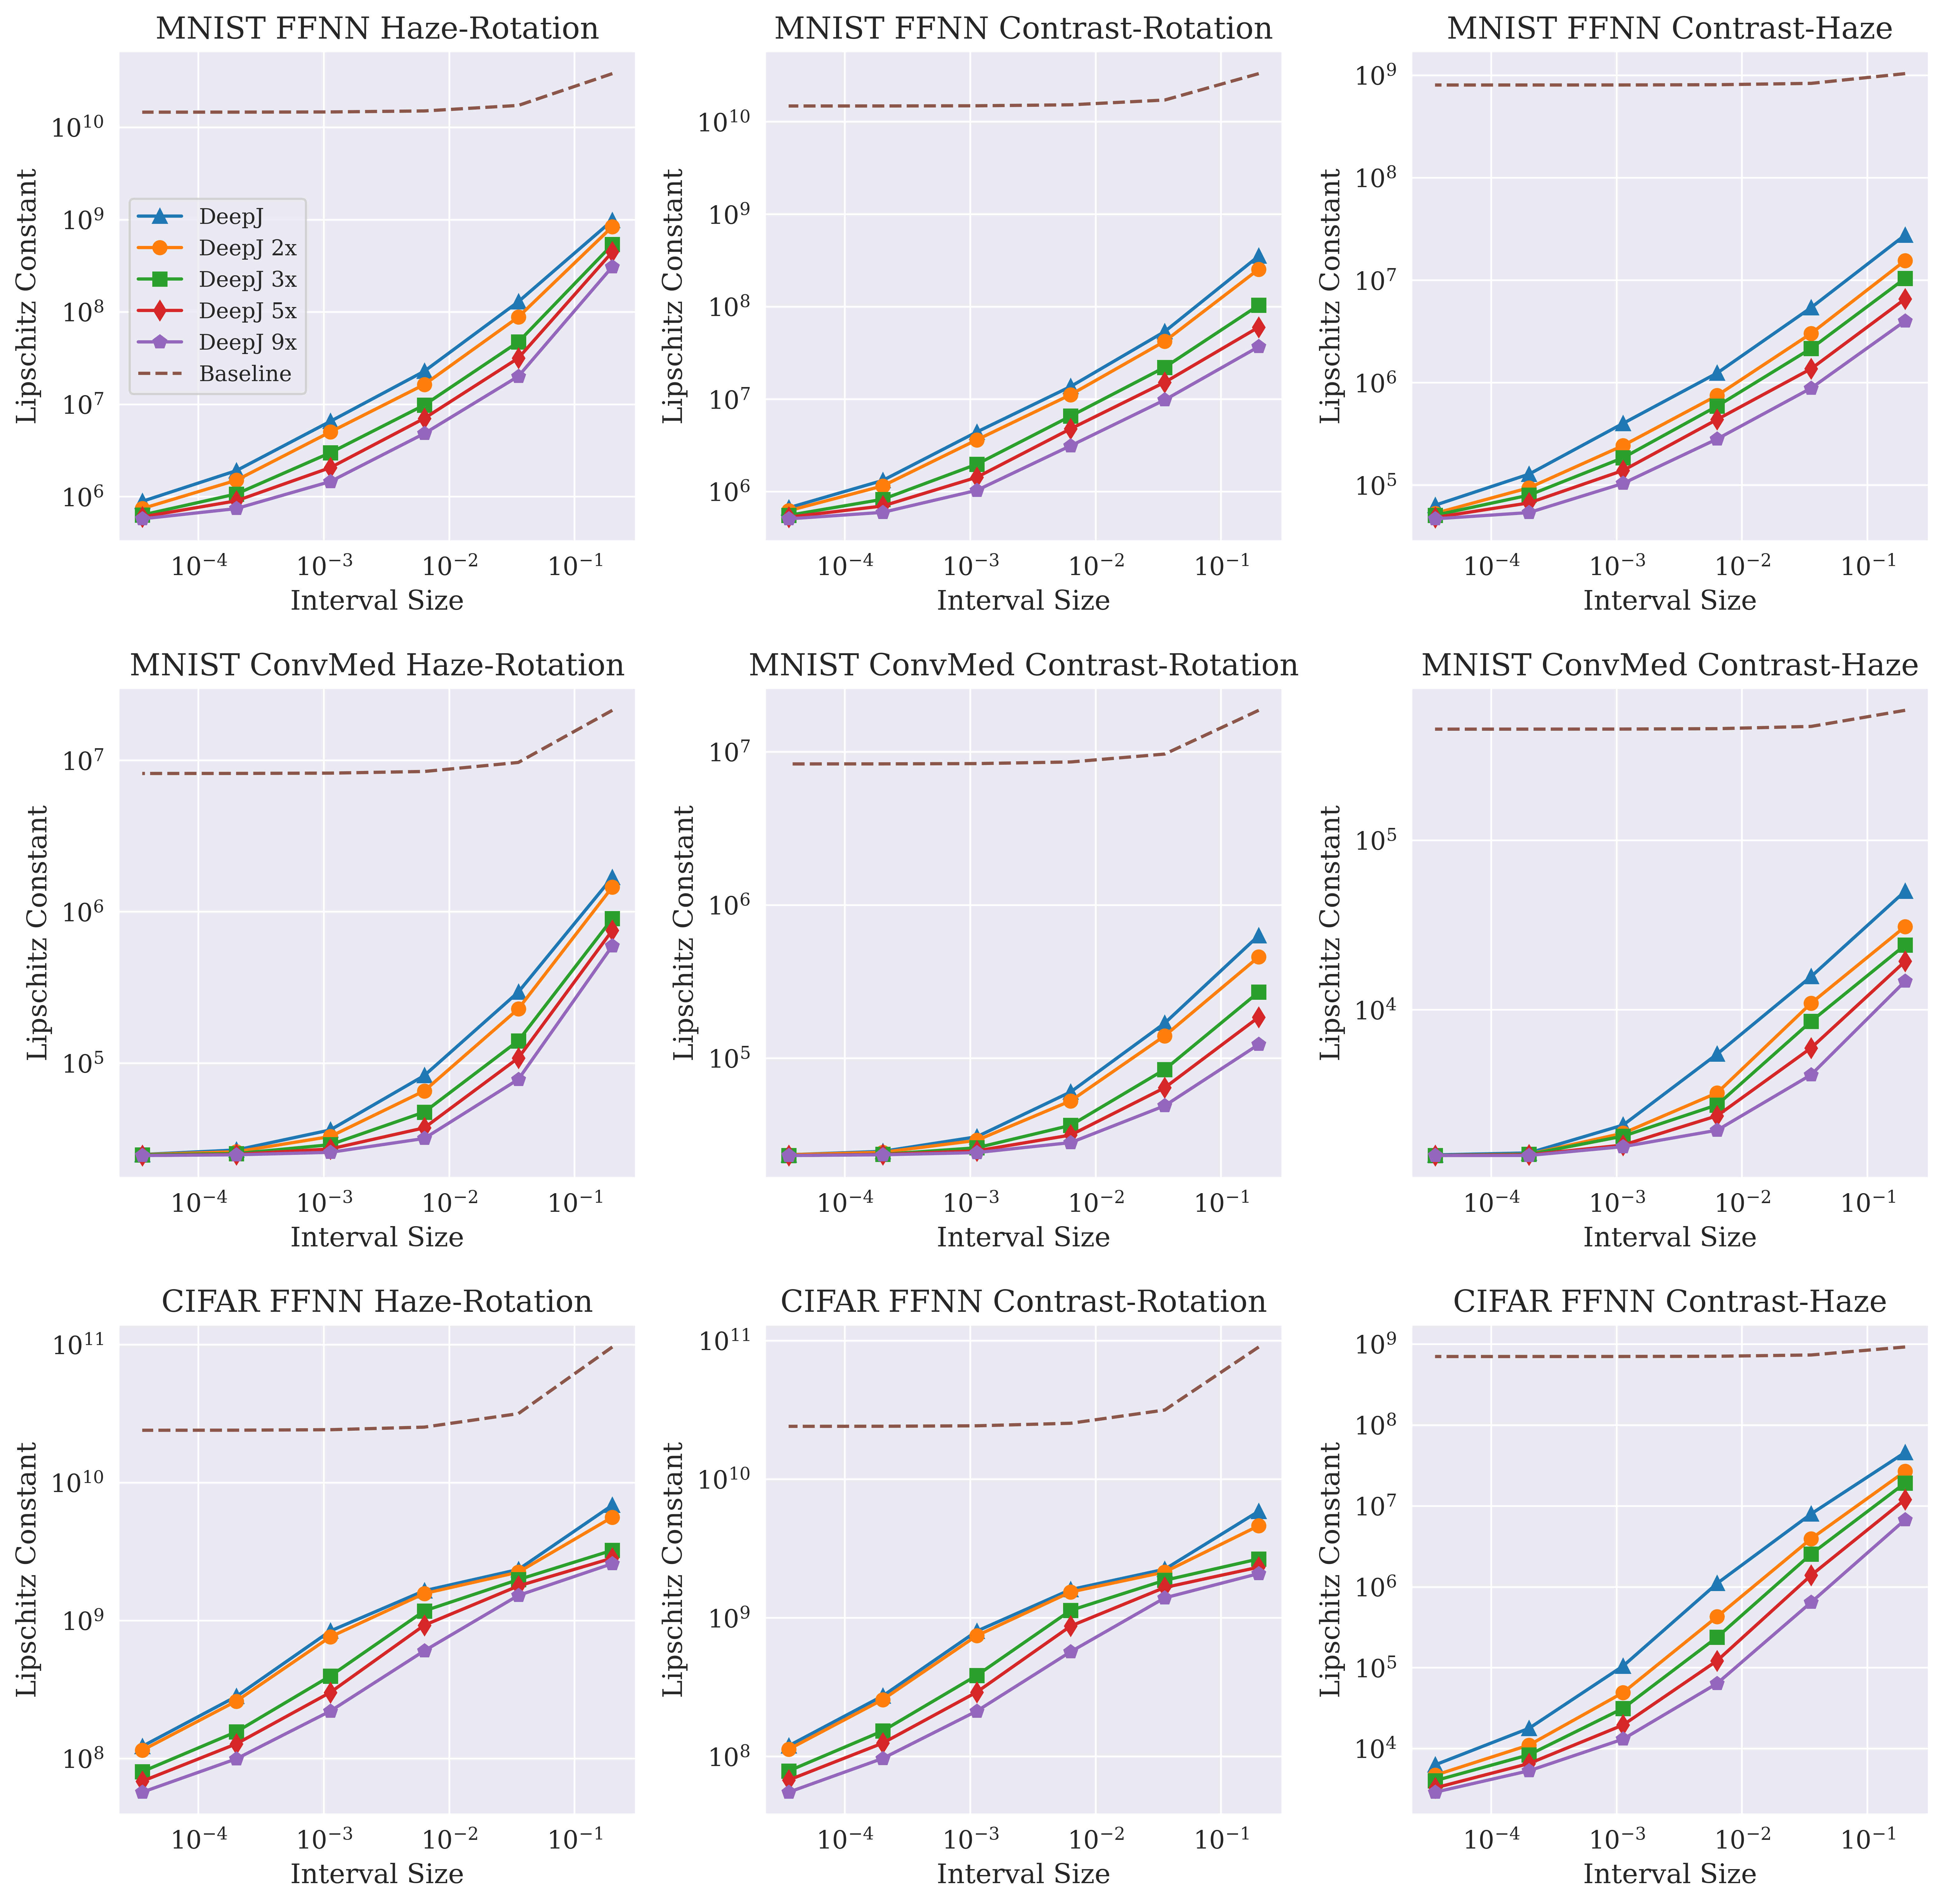

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

tool = 'DeepJ'
fig, axs = plt.subplots(3, 3, figsize=(15, 15), dpi=500)
plt.subplots_adjust(hspace=0.3, wspace=0.25)

for dataset, net, i in [('MNIST', 'FFNN', 0), ('MNIST', 'ConvMed', 1), ('CIFAR', 'FFNN', 2)]:
    for j, perturbation in enumerate(perturbations):
        axs[i, j].set_title(f'{dataset} {net} {plots_perturbations[perturbation]}')
        axs[i, j].set_xlabel(u'Interval Size')
        axs[i, j].set_ylabel('Lipschitz Constant')
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')

        interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')

        interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

        interval_size, time, lc = zip(*all_data_splitting3[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 3x')

        interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 5x')

        interval_size, time, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 9x')

        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        interval_size = baseline['interval_size']
        axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')

        if dataset == 'MNIST' and net == 'FFNN' and perturbation == 'HazeThenRotation':
            axs[i, j].legend()

plt.savefig('lipschitz_compose_APPENDIX.png', bbox_inches='tight')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median as med

sns.set_style("darkgrid")

tool = 'DeepJ'

num_rows = 6
zeros = ('0\\\\' * num_rows)[:-2]
entries = (r'& \begin{tabular}[c]{@{}l@{}}' + zeros + r'\end{tabular} ') * 9

table = r"""
\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze-Rotation} & \multicolumn{3}{c|}{Contrast-Rotation} & \multicolumn{3}{c}{Contrast-Haze} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline
""" + f"""
MNIST ConvBig {entries} \\\\
\hline
CIFAR ConvMed {entries} \\\\
\hline
CIFAR ConvBig {entries} \\\\
""" + r"""\end{tabular}"""

for dataset, net, i in [('MNIST','ConvBig', 0), ('CIFAR','ConvMed', 1), ('CIFAR','ConvBig', 2)]:
    for perturbation in perturbations:
        interval_size, time1, lc = zip(*all_data[dataset][net][perturbation])
        interval_size, time2, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        interval_size, time3, lc = zip(*all_data_splitting3[dataset][net][perturbation])
        interval_size, time5, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        interval_size, time9, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        
        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        timebase = baseline['time']
        timebase += network_baselines[net][dataset][1]
        
        baseline_round = 1
        if perturbation == 'ContrastVariationThenHaze':
            baseline_round = 2
        
        table = table.replace(zeros, f'{round(min(time1)/1000, 1)}\\\\{round(min(time2)/1000, 1)}\\\\{round(min(time3)/1000, 1)}\\\\{round(min(time5)/1000, 1)}\\\\{round(min(time9)/1000, 1)}\\\\{round(min(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(med(time1)/1000, 1)}\\\\{round(med(time2)/1000, 1)}\\\\{round(med(time3)/1000, 1)}\\\\{round(med(time5)/1000, 1)}\\\\{round(med(time9)/1000, 1)}\\\\{round(med(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(max(time1)/1000, 1)}\\\\{round(max(time2)/1000, 1)}\\\\{round(max(time3)/1000, 1)}\\\\{round(max(time5)/1000, 1)}\\\\{round(max(time9)/1000, 1)}\\\\{round(max(timebase)/1000, baseline_round)}', 1)
        
print(table)


\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze-Rotation} & \multicolumn{3}{c|}{Contrast-Rotation} & \multicolumn{3}{c}{Contrast-Haze} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline

MNIST ConvBig & \begin{tabular}[c]{@{}l@{}}14.8\\58.7\\76.0\\102.5\\247.7\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}14.9\\59.6\\76.6\\103.4\\251.3\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}24.4\\72.2\\78.0\\107.6\\263.6\\13.9\end{tabular} & \begin{tabular}[c]{@{}l@{}}14.7\\58.8\\75.7\\102.3\\246.4\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}14.9\\59.1\\76.3\\102.5\\248.8\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}20.9\\70.9\\77.6\\105.7\\257.3\\13.8\end{tabular} & \begin{tabular}[c]{@{}l@{}}6.3\\24.8\\33.8\\52.3\\158.6\\0.06\end{tabular} & \begin{tabular}[c]{@{}l@{}}6.4\\25.2\\34.2\\52.8\\160.0\\0.07\end{tabular} & \begin{tabular}[c]{@{}l@{}}6.7\\26.0\\35.0\\55.4\\174.0\\0.08\end{tabular}  \\
\hline
CIFAR ConvMed & \begin{tabular}[c]{@{}l@{}}42.2\\167.2\\209

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median as med

sns.set_style("darkgrid")

tool = 'DeepJ'

num_rows = 6
zeros = ('0\\\\' * num_rows)[:-2]
entries = (r'& \begin{tabular}[c]{@{}l@{}}' + zeros + r'\end{tabular} ') * 9

table = r"""
\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze-Rotation} & \multicolumn{3}{c|}{Contrast-Rotation} & \multicolumn{3}{c}{Contrast-Haze} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline
""" + f"""
MNIST FFNN {entries} \\\\
\hline
MNIST ConvMed {entries} \\\\
\hline
CIFAR FFNN {entries} \\\\
""" + r"""\end{tabular}"""

for dataset, net, i in [('MNIST','FFNN',0), ('MNIST','ConvMed',1), ('CIFAR','FFNN',2)]:
    for perturbation in perturbations:
        interval_size, time1, lc = zip(*all_data[dataset][net][perturbation])
        interval_size, time2, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        interval_size, time3, lc = zip(*all_data_splitting3[dataset][net][perturbation])
        interval_size, time5, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        interval_size, time9, lc = zip(*all_data_splitting9[dataset][net][perturbation])
        
        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        timebase = baseline['time']
        timebase += network_baselines[net][dataset][1]
        
        baseline_round = 1
        if perturbation == 'ContrastVariationThenHaze':
            baseline_round = 2
        
        table = table.replace(zeros, f'{round(min(time1)/1000, 1)}\\\\{round(min(time2)/1000, 1)}\\\\{round(min(time3)/1000, 1)}\\\\{round(min(time5)/1000, 1)}\\\\{round(min(time9)/1000, 1)}\\\\{round(min(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(med(time1)/1000, 1)}\\\\{round(med(time2)/1000, 1)}\\\\{round(med(time3)/1000, 1)}\\\\{round(med(time5)/1000, 1)}\\\\{round(med(time9)/1000, 1)}\\\\{round(med(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(max(time1)/1000, 1)}\\\\{round(max(time2)/1000, 1)}\\\\{round(max(time3)/1000, 1)}\\\\{round(max(time5)/1000, 1)}\\\\{round(max(time9)/1000, 1)}\\\\{round(max(timebase)/1000, baseline_round)}', 1)
        
print(table)


\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze-Rotation} & \multicolumn{3}{c|}{Contrast-Rotation} & \multicolumn{3}{c}{Contrast-Haze} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline

MNIST FFNN & \begin{tabular}[c]{@{}l@{}}9.4\\37.4\\47.9\\58.6\\125.9\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}9.7\\42.2\\48.3\\58.6\\128.6\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}15.3\\48.5\\48.8\\65.3\\129.9\\13.9\end{tabular} & \begin{tabular}[c]{@{}l@{}}9.3\\37.2\\47.9\\58.6\\124.6\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}9.4\\37.3\\48.2\\58.8\\126.6\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}15.1\\48.0\\49.2\\61.2\\133.9\\13.8\end{tabular} & \begin{tabular}[c]{@{}l@{}}1.0\\4.0\\5.6\\8.7\\26.5\\0.06\end{tabular} & \begin{tabular}[c]{@{}l@{}}1.1\\4.0\\5.8\\9.0\\26.7\\0.07\end{tabular} & \begin{tabular}[c]{@{}l@{}}1.1\\4.1\\6.1\\9.2\\27.1\\0.08\end{tabular}  \\
\hline
MNIST ConvMed & \begin{tabular}[c]{@{}l@{}}9.0\\35.5\\44.8\\53.3\\113.5\\8.2\end{tab